In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

# iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [36]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])


In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


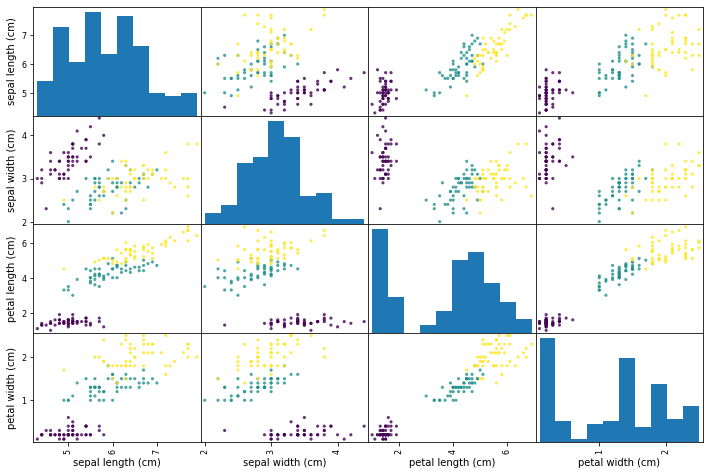

In [38]:
pd.plotting.scatter_matrix(df, c=iris['target'], marker='o', s=10, alpha=.8, figsize=(12, 8))
plt.show()

In [39]:
X = iris.data
Y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [40]:
print(target_names)

['setosa' 'versicolor' 'virginica']


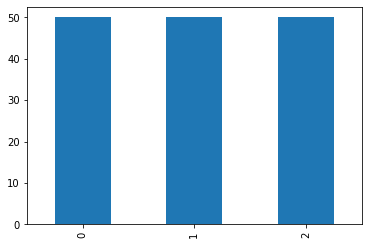

In [41]:
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

C:\Users\ourcl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


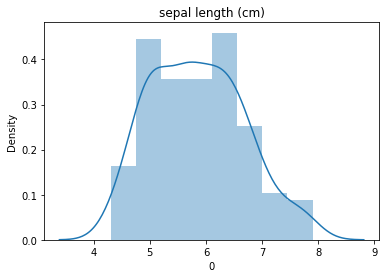

C:\Users\ourcl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


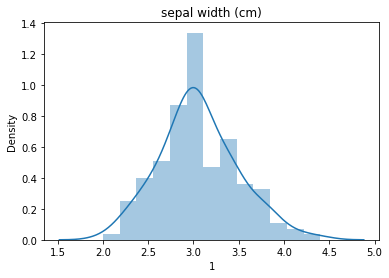

C:\Users\ourcl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


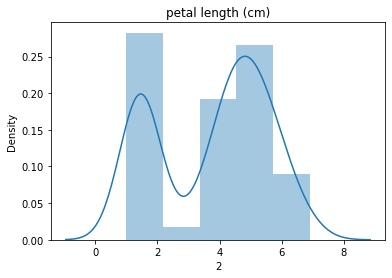

C:\Users\ourcl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


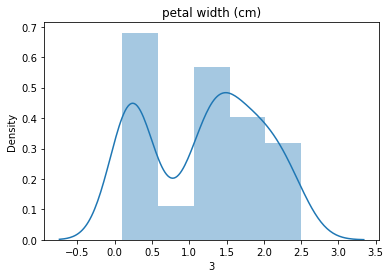

In [42]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [43]:
pca = PCA(n_components=2)
pca.fit(X)
PC_score = pca.transform(X)

# print(PC_score)
# print(PC_score.shape)

In [44]:
# pca 의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

# TODO 1

2차원 데이터가 주어졌을때 이를 scatter 하는 함수를 구현하시오.

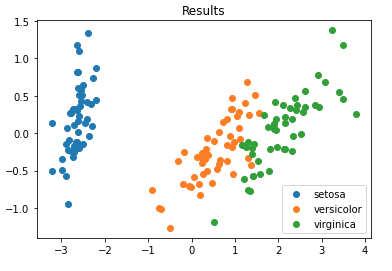

In [45]:
# 아래 그림은 정답 예시
Image("show2D_sample.png")

In [46]:
# Hint
# plt.legend(), plt.title(), plt.scatter() 함수 이용

def show2D(pca_score, Y, target_names):
    plt.figure()
    # TODO -->
    pca_score = pd.DataFrame(pca_score)
    pca_score['target'] = Y
    #print(pca_score)
    
    number = []
    for i in range(len(target_names)):
        number.append(i)
    pca_score['target'].replace(number,target_names,inplace=True)
    colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
    for target, color in zip(target_names,colors):
        IdxToKeep = pca_score['target'] == target
        plt.scatter(pca_score.loc[IdxToKeep, 0]
                    ,pca_score.loc[IdxToKeep, 1]
                    ,c = color
                    ,s= 50)
    plt.title('Results')
    plt.legend(target_names, loc='lower right')
    # <--

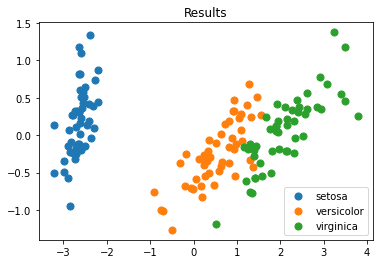

In [47]:
# Y = iris.target
# target_names = iris.target_names
# pca = PCA(n_components=2)
# pca.fit(X)
# PC_score = pca.transform(X)
# Y = iris.target
# target_names = iris.target_names

show2D(PC_score, Y, target_names)

# TODO 2

PCA 함수를 구현하시오.

## 요구사항
1. normalize 한 
2. 아래의 numpy 내장 함수 사용 가능
    - ```numpy.mean()```
    - ```numpy.linalg.eig()```
    - ```numpy.dot()```

In [48]:
def student_pca(X, n_components=2):
    pca_results = None
    # TODO -->

    # Covariance Matrix
    features = X.T
    cov_matrix = np.cov(features)

    # Eigendecomposition
    values, vectors = np.linalg.eig(cov_matrix)
    idx = values.argsort()[::-1]
    values = values[idx]
    vectors = vectors[:,idx]

    # orthogonal projection
    new = np.dot(X - X.mean(0), vectors[:,:n_components])
    return (new)

pca_student_score = student_pca(X, n_components=2)
# print(pca_student_score)
# print(PC_score)

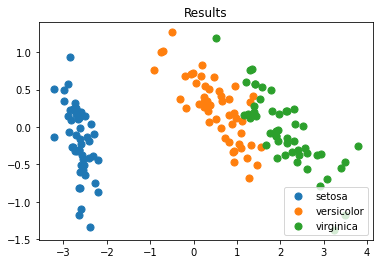

In [49]:
show2D(pca_student_score, Y, target_names)

# TODO 3

digits data 를 이용하여 PCA 결과를 확인하시오.

In [50]:
digits = datasets.load_digits()

In [51]:
# TODO -->

In [52]:
df_digits = pd.DataFrame(digits['data'], columns=digits['feature_names'])
df_digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [53]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names

pca = student_pca(X,n_components=2)

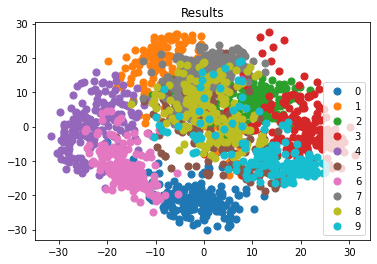

In [54]:
show2D(pca, Y, target_names)

# <--

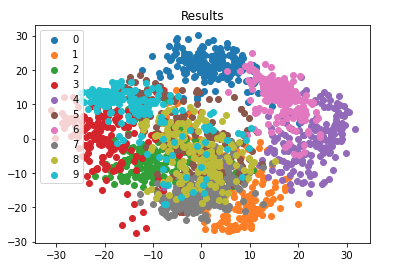

In [55]:
# 예시 정답
Image('digits_sample.png')

# TODO 4

TSNE 를 이용하여 digits 데이터의 결과를 Visualizing 하시오.

In [56]:
from sklearn.manifold import TSNE



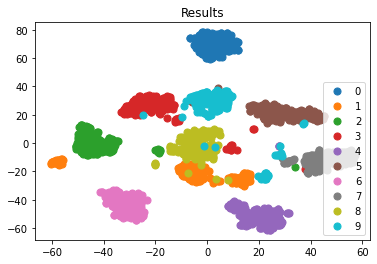

In [57]:
tsne = TSNE(n_components=2)
digits_tsne = tsne.fit_transform(digits.data)

# def show2D(pca_score, Y, target_names):
show2D(digits_tsne, Y, target_names)

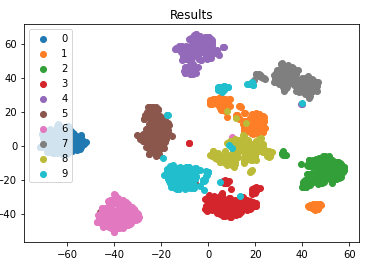

In [58]:
# 예시 정답
Image('tsne_sample.png')

# 과제 : PCA Reconstruction# 과제 : PCA reconstruction

Digits 데이터를 2차원, 3차원, 4차원, 32차원으로 PCA 한 결과를 reconstruction 했을 때 원래 데이터와의 MSE(Mean Square Error) 을 확인 및 복원데이터를 시각화하고 오차율이 다른 이유를 분석하여 보고서를 제출하시오. (코드, 분석내용 첨부)

- 제출형식: {분반}_{학번}_{이름}.zip (ex: 1_20210928_홍길동.zip)
- 제출파일: 보고서({분반}_{학번}_{이름}.pdf), 주피터노트북 파일({분반}_{학번}_{이름}.ipynb)
- 제출기한: 일주일 (사이버캠퍼스 참고)

In [59]:
digits = datasets.load_digits()

In [60]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names
n_samples = X.shape[0]
images = X.reshape((n_samples, -1))
print(images.shape)

(1797, 64)


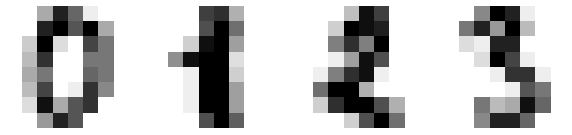

In [61]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

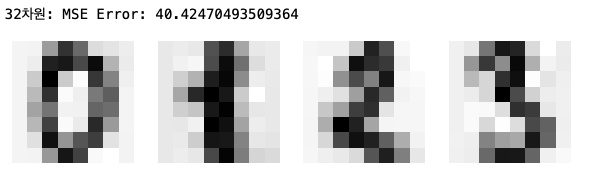

In [62]:
# 예시
Image('assignment_sample.png')

In [63]:
def mse(X_train, X_projected):
    return np.sum((X_train - X_projected) ** 2, axis=1).mean()

def pca_reconstruct(X, n_components=2):
    pca_results = None
    # TODO -->

    # Covariance Matrix
    X = X #- X.mean(axis = 0)
    features = X.T
    cov_matrix = np.cov(features)

    # Eigendecomposition
    values, vectors = np.linalg.eig(cov_matrix)
    #print(vectors.shape)
    idx = values.argsort()[::-1]
    values = values[idx]
    vectors = vectors[:,idx]
    index = list(idx)

    new = np.dot(X-X.mean(axis=0),vectors[:,:n_components])
    images = np.dot(new,vectors[:,:n_components].T) +X.mean(axis=0)

    MSE = mse(images,X)

    return images, MSE

2 dim's MSE : 858.9447808487329


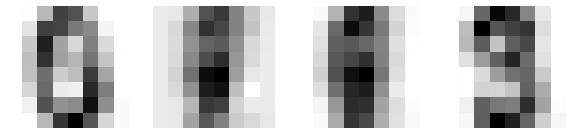

In [64]:
# 2 dimension PCA reconstriction
# And calculate MSE

dim = 2
images, MSE = pca_reconstruct(X,dim)
print("{} dim's MSE : {}".format(dim,MSE))
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

3 dim's MSE : 717.2352446162665


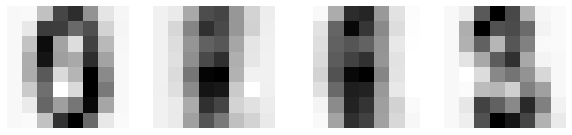

In [65]:
# 3 dimension PCA reconstriction
# And calculate MSE

dim = 3 
images, MSE = pca_reconstruct(X,dim)
print("{} dim's MSE : {}".format(dim,MSE))
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

4 dim's MSE : 616.1911300562696


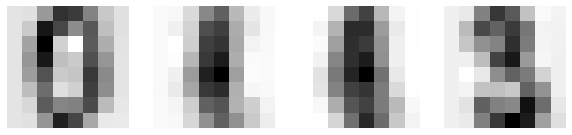

In [66]:
# 4 dimension PCA reconstriction
# And calculate MSE

dim = 4
images, MSE = pca_reconstruct(X,dim)
print("{} dim's MSE : {}".format(dim,MSE))
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

32 dim's MSE : 40.42470493509364


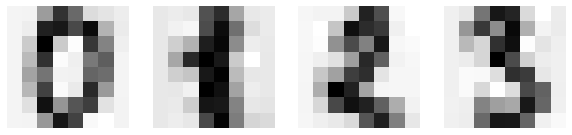

In [67]:
# 32 dimension PCA reconstriction
# And calculate MSE

dim = 32
images, MSE = pca_reconstruct(X,dim)
print("{} dim's MSE : {}".format(dim,MSE))
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')